In [21]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [37]:
# Создаем массив значений времени
t = np.linspace(0, 8*np.pi, 10000)  # от 0 до 2π, 1000 точек

# Параметры синусоиды
amplitude = 8.0  # амплитуда
frequency = 5.0  # частота
phase = np.pi/4      # начальная фаза

# Генерируем синусоиду
signal = amplitude * np.sin(frequency * t + phase)

noise = 1 * np.random.normal(0, 1, len(t))
signal_noisy = signal + noise


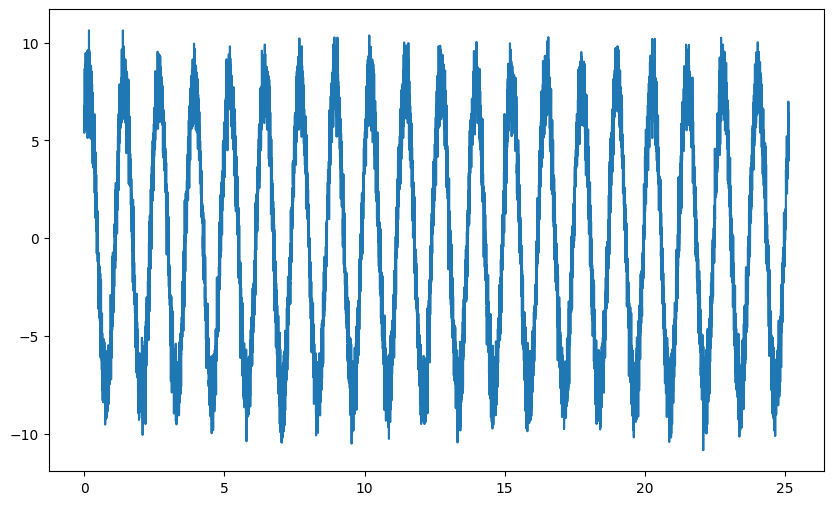

In [38]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t, signal_noisy, label='Синусоида')

Амплитуда: 0.9999997380080544
Фаза: -0.7840915237832827 радиан


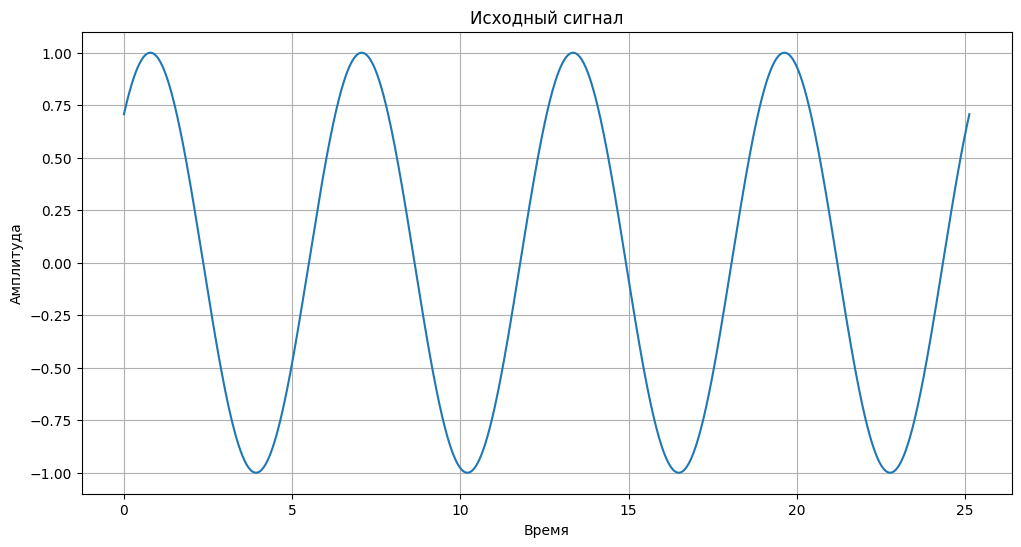

In [39]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq

# Генерация тестового сигнала
# t = np.linspace(0, 1, 1000, endpoint=False)
# A = 2.5  # Амплитуда
# phi = np.pi/4  # Фаза
# f = 5  # Частота
# signal = A * np.sin(2 * np.pi * f * t + phi)

# Создаем массив значений времени
t = np.linspace(0, 8*np.pi, 10000)  # от 0 до 2π, 1000 точек

# Параметры синусоиды
amplitude = 1.0  # амплитуда
frequency = 1.0  # частота
phase = np.pi/4      # начальная фаза

# Генерируем синусоиду
y = amplitude * np.sin(frequency * t + phase)

noise = 0.1 * np.random.normal(0, 1, len(t))
y_noisy = y + noise

# Преобразование Фурье
yf = fft(y)
xf = fftfreq(len(t), t[24] - t[0])

# Находим максимальную амплитуду
max_freq_idx = np.argmax(np.abs(yf))
amplitude = 2/len(t) * np.abs(yf[max_freq_idx])
phase = np.angle(yf[max_freq_idx])

print(f"Амплитуда: {amplitude}")
print(f"Фаза: {phase} радиан")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

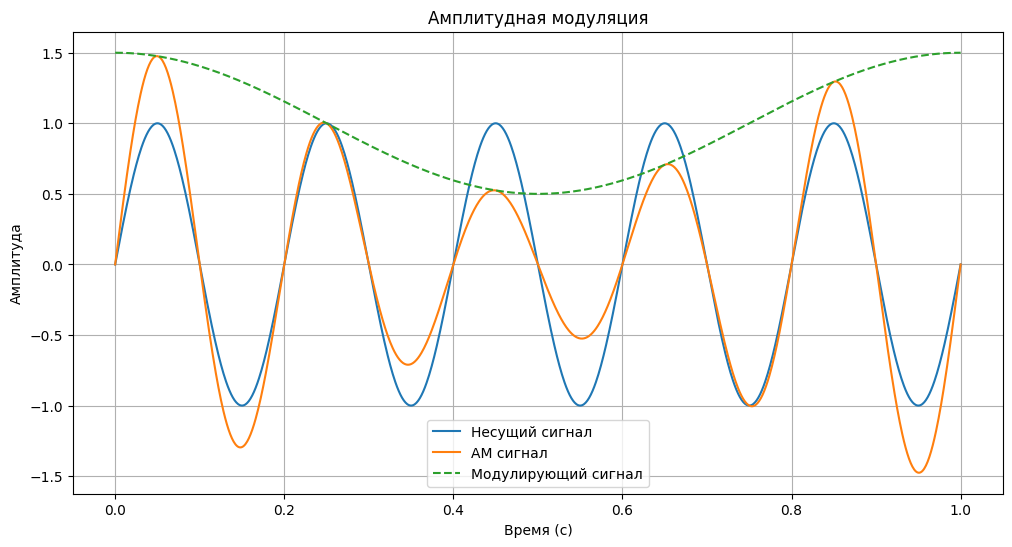

In [18]:
# Параметры несущего сигнала
t = np.linspace(0, 1, 1000)  # время
f_c = 5  # частота несущей
A_c = 1  # амплитуда несущей

# Модулирующий сигнал
f_m = 1  # частота модулирующего сигнала
A_m = 0.5  # амплитуда модулирующего сигнала

# Генерация сигналов
carrier = A_c * np.sin(2 * np.pi * f_c * t)
modulator = 1 + A_m * np.cos(2 * np.pi * f_m * t)  # модулирующий сигнал
am_signal = carrier * modulator  # АМ сигнал

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, carrier, label='Несущий сигнал')
plt.plot(t, am_signal, label='АМ сигнал')
plt.plot(t, modulator, label='Модулирующий сигнал', linestyle='--')
plt.legend()
plt.title('Амплитудная модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

Амплитуда: 2.5
Фаза: -0.7853981633974482 радиан


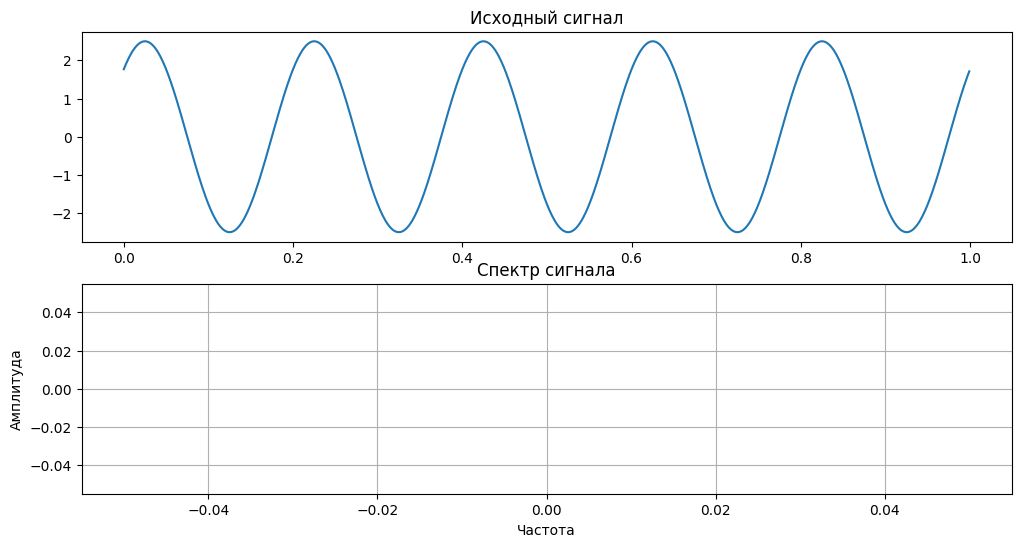

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Генерация тестового сигнала
t = np.linspace(0, 1, 1000, endpoint=False)  # 1 секунда, 1000 точек
A = 2.5  # Амплитуда
phi = np.pi/4  # Фаза
f = 5  # Частота
signal = A * np.sin(2 * np.pi * f * t + phi)

# Преобразование Фурье
yf = fft(signal)
xf = fftfreq(len(t), t[1] - t[0])

# Находим максимальную амплитуду
max_freq_idx = np.argmax(np.abs(yf))
amplitude = 2/len(t) * np.abs(yf[max_freq_idx])
phase = np.angle(yf[max_freq_idx])

print(f"Амплитуда: {amplitude}")
print(f"Фаза: {phase} радиан")

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')

plt.subplot(2, 1, 2)
plt.plot(xf[-10:10], np.abs(yf)[-10:10])
plt.title('Спектр сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Генерация тестового сигнала
def generate_noisy_signal(freq, duration, amp, phase, noise_level):
    t = np.linspace(0, duration, int(1000*duration), endpoint=False)
    signal = amp * np.sin(2 * np.pi * freq * t + phase)
    noise = noise_level * np.random.normal(size=t.shape)
    return t, signal + noise

# Параметры сигнала
freq = 1  # Гц
duration = 10  # секунд (10 периодов)
amp = 1.0  # амплитуда
phase = np.pi/4  # начальная фаза
noise_level = 0.5  # уровень шума

# Генерация сигнала
t, noisy_signal = generate_noisy_signal(freq, duration, amp, phase, noise_level)

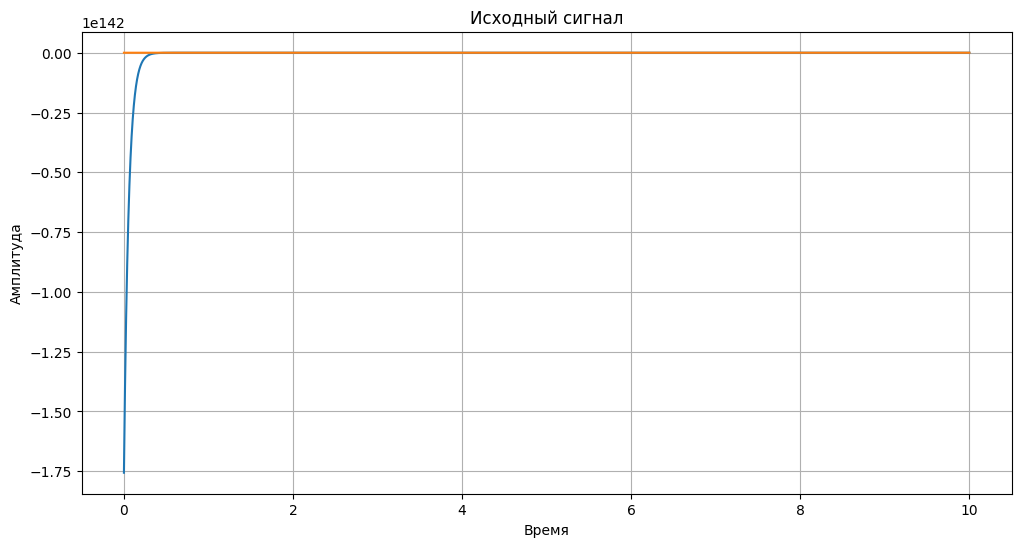

In [55]:

# Создание полосового фильтра Баттерворта
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Параметры фильтрации
lowcut = 0.9 * freq  # нижняя граница полосы пропускания
highcut = 1.1 * freq  # верхняя граница полосы пропускания
fs = 1000  # частота дискретизации

# Фильтрация сигнала
filtered_signal = bandpass_filter(noisy_signal, lowcut, highcut, fs, order=4)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_signal)
plt.plot(t, noisy_signal)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [ ]:

# Определение амплитуды
amplitude = np.max(np.abs(filtered_signal))

# Определение фазы
def find_zero_crossing(t, signal):
    # Находим пересечение с нулем
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    if len(zero_crossings) > 0:
        first_zero = zero_crossings[0]
        # Линейная интерполяция для точного определения момента пересечения
        t1, t2 = t[first_zero], t[first_zero+1]
        y1, y2 = signal[first_zero], signal[first_zero+1]
        t_zero = t1 - y1 * (t2 - t1) / (y2 - y1)
        return t_zero
    return None

t_zero = find_zero_crossing(t, filtered_signal)
print(t_zero)
phase_rad = 2 * np.pi * freq * t_zero  # фаза в радианах

In [ ]:

# Визуализация результатов
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, label='Зашумлённый сигнал', alpha=0.5)
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', color='red')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(t_zero, color='green', linestyle='--', label=f'Нулевой переход t={t_zero:.2f} с')
plt.legend()
plt.title('Фильтрация сигнала')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(t_zero, color='green', linestyle='--')
plt.title(f'Амплитуда: {amplitude:.2f}, Фаза: {phase_rad:.2f} рад')
plt.tight_layout()
plt.show()

print(f"Определённая амплитуда: {amplitude:.2f}")
print(f"Определённая фаза в нулевой точке: {phase_rad:.2f} радиан")


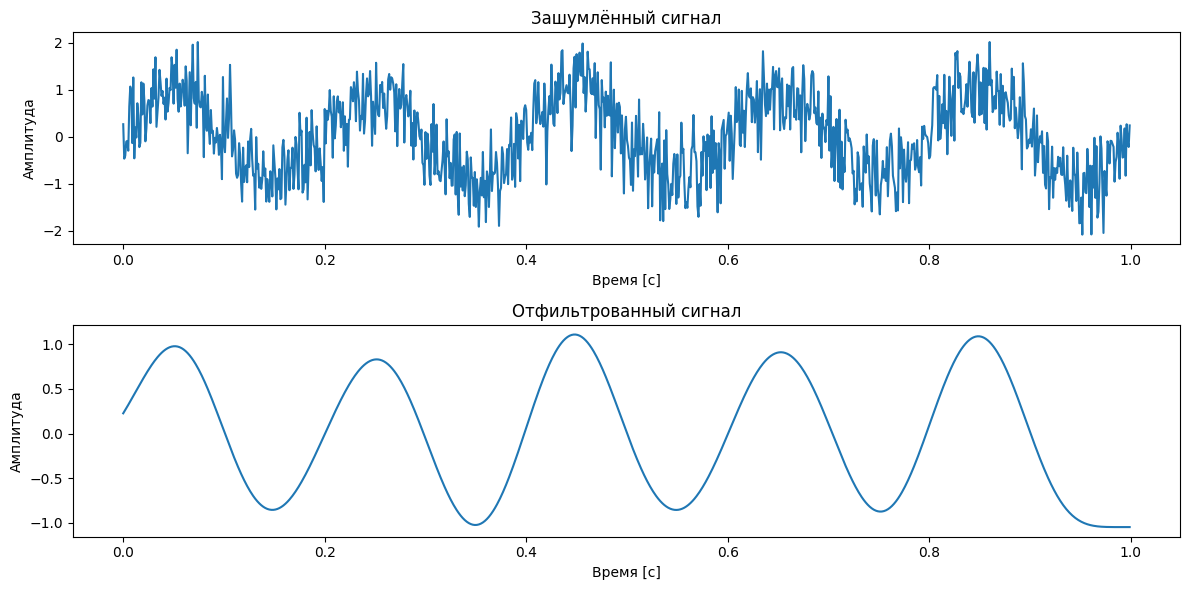

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Генерация тестового сигнала
fs = 1000  # частота дискретизации
t = np.linspace(0, 1, fs, False)  # временной массив
f = 5  # частота синусоиды
signal = np.sin(f * 2 * np.pi * t)  # чистый сигнал

# Добавление шума
noise = 0.5 * np.random.normal(0, 1, signal.shape)  # гауссовский шум
noisy_signal = signal + noise

# Визуализация исходного сигнала
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Зашумлённый сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')

# Создание и применение фильтра Баттерворта
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def filter_signal(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Параметры фильтра
cutoff = 10  # частота среза
order = 6  # порядок фильтра

# Фильтрация сигнала
filtered_signal = filter_signal(noisy_signal, cutoff, fs, order)

# Визуализация результата
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.tight_layout()
plt.show()


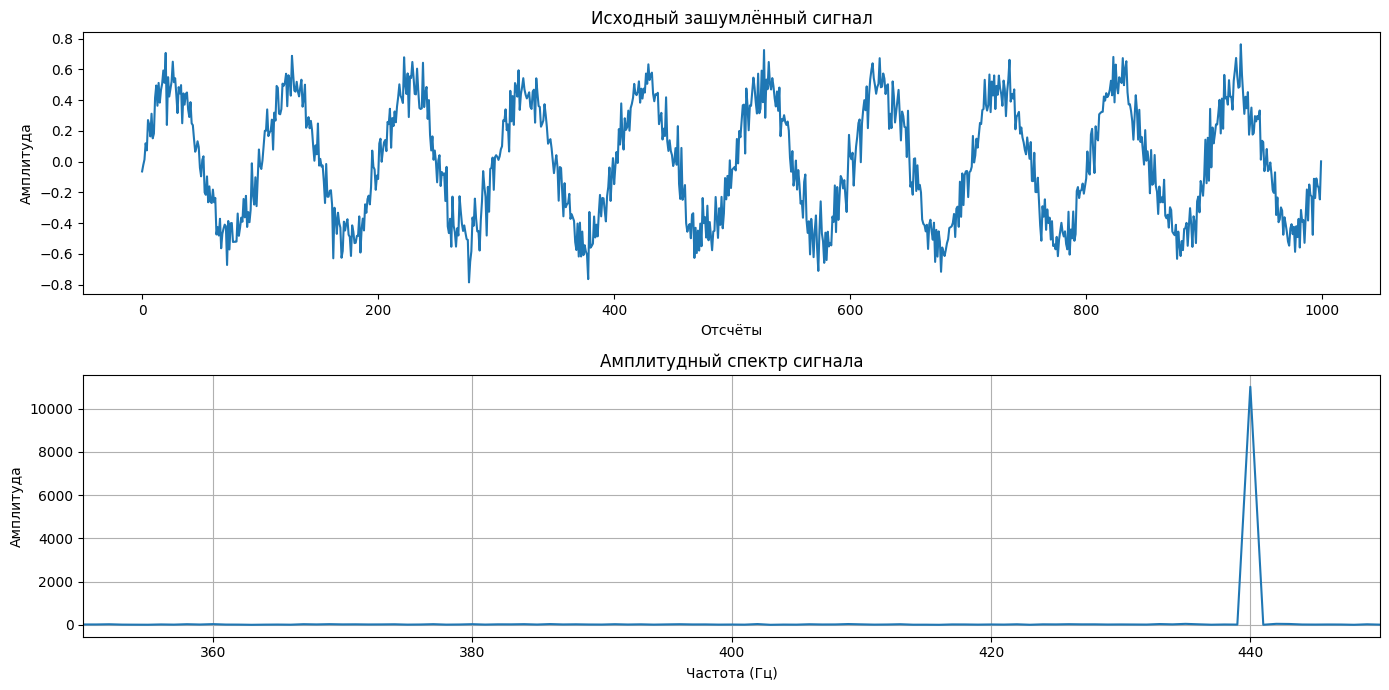

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile  # если сигнал в wav формате

# Пример генерации тестового сигнала (можно заменить на загрузку реального)
def generate_test_signal():
    fs = 44100  # частота дискретизации
    t = np.linspace(0, 1, fs, False)  # временной массив
    f = 440  # частота синусоиды (например, нота ля)
    signal = 0.5 * np.sin(2 * np.pi * f * t)  # чистый сигнал
    
    # Добавляем шум
    noise = 0.1 * np.random.normal(0, 1, signal.shape)
    noisy_signal = signal + noise
    return noisy_signal, fs

# Загрузка реального сигнала (если нужно)
# fs, noisy_signal = wavfile.read('your_signal.wav')

# Генерируем тестовый сигнал
noisy_signal, fs = generate_test_signal()

# Выполняем преобразование Фурье
n = len(noisy_signal)
f = np.fft.rfftfreq(n, 1/fs)  # частоты
fft_result = np.fft.rfft(noisy_signal)  # прямое преобразование

# Вычисляем амплитудный спектр
amplitude = np.abs(fft_result)

# Визуализация результатов
plt.figure(figsize=(14, 7))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(noisy_signal[:1000])  # показываем первые 1000 точек
plt.title('Исходный зашумлённый сигнал')
plt.xlabel('Отсчёты')
plt.ylabel('Амплитуда')

# Спектр сигнала
plt.subplot(2, 1, 2)
plt.plot(f, amplitude)
plt.title('Амплитудный спектр сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(350, 450)  # ограничиваем по частоте для наглядности
plt.grid()

plt.tight_layout()
plt.show()
